In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam
import datetime as dt

# Define the stock symbols
stock_symbols = ['GOOGL', 'META', 'GM', 'GS']

# Define the start and end dates
start_date = dt.datetime(2012, 1, 1)
end_date = dt.datetime(2023, 8, 22)

# Function to fetch historical stock price data
def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

# Function to preprocess and scale data
def preprocess_data(data):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))
    return scaled_data, scaler

# Loop through each stock symbol
all_predictions = {}
results = {}

for symbol in stock_symbols:
    # Fetch and preprocess data
    stock_data = fetch_stock_data(symbol, start_date, end_date)
    scaled_data, scaler = preprocess_data(stock_data)

    # Create sequences
    seq_length = 10
    sequences = []
    targets = []
    for i in range(len(scaled_data) - seq_length):
        sequences.append(scaled_data[i:i+seq_length])
        targets.append(scaled_data[i+seq_length])

    sequences = np.array(sequences)
    targets = np.array(targets)

    # Split data into train and test sets
    train_size = int(0.8 * len(sequences))
    train_X, test_X = sequences[:train_size], sequences[train_size:]
    train_y, test_y = targets[:train_size], targets[train_size:]

    # Create combined GRU-LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
    model.add(GRU(units=50))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Train the model
    model.fit(train_X, train_y, epochs=50, batch_size=32, verbose=2)

    # Make predictions
    test_predictions = model.predict(test_X)

    # Inverse transform the scaled data to original values
    test_predictions = scaler.inverse_transform(test_predictions)
    test_y_original = scaler.inverse_transform(test_y.reshape(-1, 1))

    # Store predictions for each stock
    all_predictions[symbol] = test_predictions

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(test_y_original, test_predictions))
    mape = mean_absolute_percentage_error(test_y_original, test_predictions)
    mae = mean_absolute_error(test_y_original, test_predictions)

    # Store results in a dictionary
    results[symbol] = {'RMSE': rmse, 'MAPE': mape, 'MAE': mae}



[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
73/73 - 6s - loss: 0.0050 - 6s/epoch - 86ms/step
Epoch 2/50
73/73 - 1s - loss: 1.2815e-04 - 550ms/epoch - 8ms/step
Epoch 3/50
73/73 - 1s - loss: 1.1899e-04 - 514ms/epoch - 7ms/step
Epoch 4/50
73/73 - 1s - loss: 1.1870e-04 - 517ms/epoch - 7ms/step
Epoch 5/50
73/73 - 0s - loss: 1.1944e-04 - 469ms/epoch - 6ms/step
Epoch 6/50
73/73 - 1s - loss: 1.1238e-04 - 512ms/epoch - 7ms/step
Epoch 7/50
73/73 - 1s - loss: 1.2242e-04 - 508ms/epoch - 7ms/step
Epoch 8/50
73/73 - 1s - loss: 1.1714e-04 - 519ms/epoch - 7ms/step
Epoch 9/50
73/73 - 0s - loss: 1.1147e-04 - 496ms/epoch - 7ms/step
Epoch 10/50
73/73 - 1s - loss: 1.2496e-04 - 513ms/epoch - 7ms/step
Epoch 11/50
73/73 - 0s - loss: 1.1556e-04 - 500ms/epoch - 7ms/step
Epoch 12/50
73/73 - 1s - loss: 1.1046e-04 - 513ms/epoch - 7ms/step
Epoch 13/50
73/73 - 0s - loss: 1.0574e-04 - 496ms/epoch - 7ms/step
Epoch 14/50
73/73 - 1s - loss: 1.0383e-04 - 525ms/epoch - 7ms/step
Epoch 15

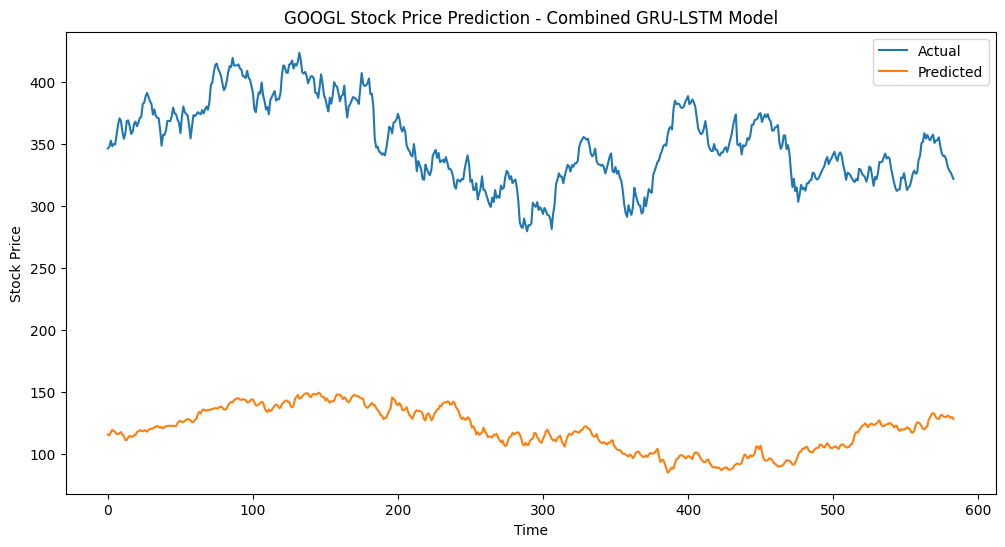

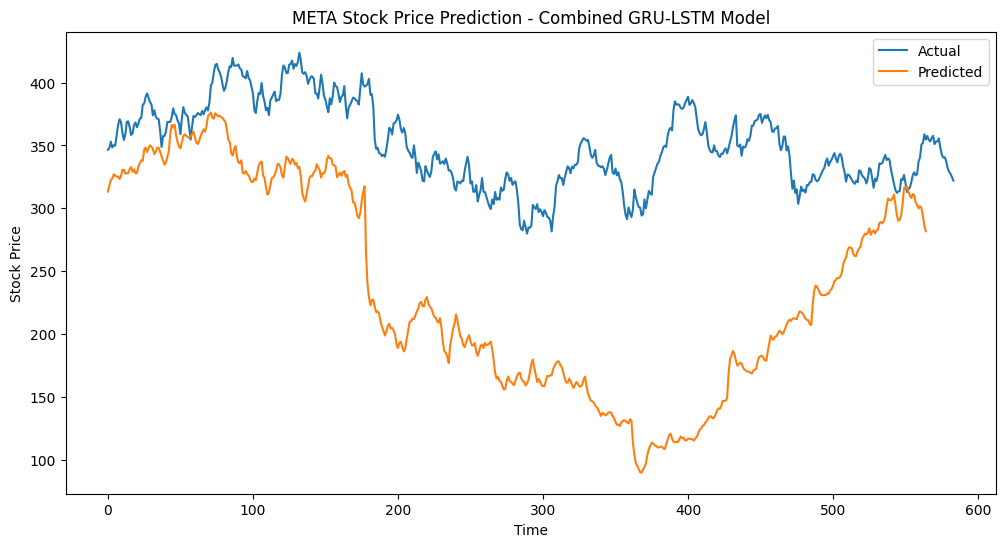

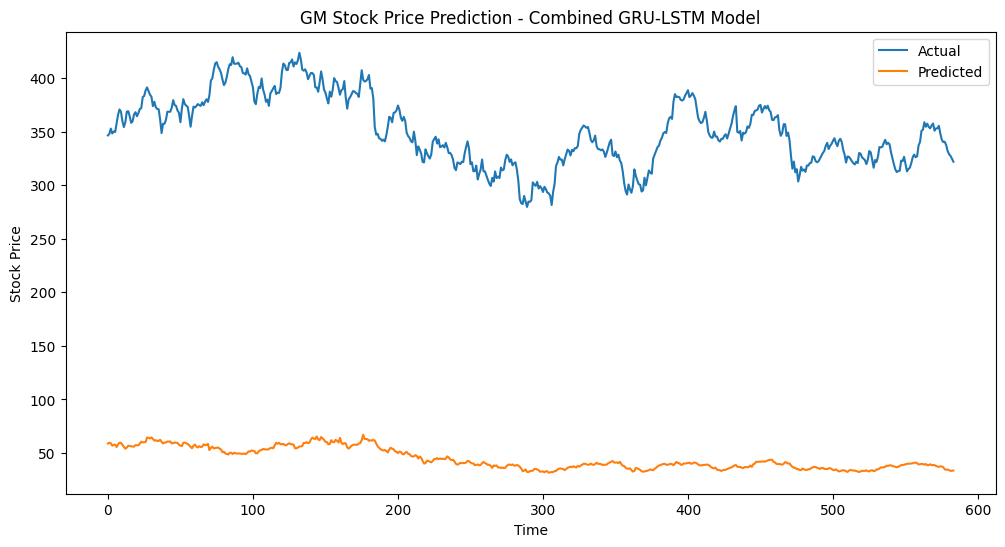

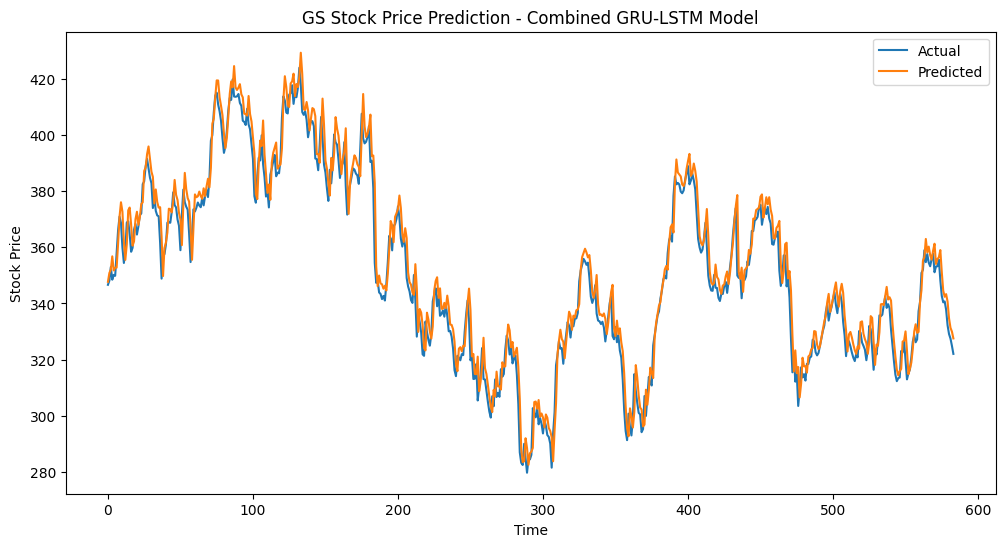

In [ ]:
# Loop through each stock symbol and plot actual vs predicted prices separately
for symbol, test_predictions in all_predictions.items():
    plt.figure(figsize=(12, 6))
    plt.plot(test_y_original, label='Actual')
    plt.plot(test_predictions, label='Predicted')
    plt.title(f'{symbol} Stock Price Prediction - Combined GRU-LSTM Model')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()


In [ ]:
# Print evaluation results for each symbol
for symbol, metrics in results.items():
    print(f"Results for {symbol}:")
    print("RMSE:", metrics['RMSE'], "MAPE:", metrics['MAPE'], "MAE:", metrics['MAE'])


Results for GOOGL:
RMSE: 2.4591179752260772 MAPE: 0.016308834297867683 MAE: 1.8869515118533617
Results for META:
RMSE: 8.054111705632936 MAPE: 0.026060339100702552 MAE: 5.674015632561878
Results for GM:
RMSE: 1.222418378789646 MAPE: 0.02159144946078588 MAE: 0.9348136921451516
Results for GS:
RMSE: 6.6734205279854155 MAPE: 0.015076789948695673 MAE: 5.228696744735928


In [ ]:
pip install scikit-learn tensorflow scikit-learn keras


In [ ]:
pip install tensorflow


In [ ]:
!pip install tensorflow


In [ ]:
#hypertuned

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam
import datetime as dt

# Define the stock symbols
stock_symbols = ['GOOGL', 'META', 'GM', 'GS']

# Define the start and end dates
start_date = dt.datetime(2012, 1, 1)
end_date = dt.datetime(2023, 8, 22)

# Function to fetch historical stock price data
def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

# Function to preprocess and scale data
def preprocess_data(data):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))
    return scaled_data, scaler

# Function to create sequences from data
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Loop through each stock symbol
results = {}
for symbol in stock_symbols:
    # Fetch and preprocess data
    stock_data = fetch_stock_data(symbol, start_date, end_date)
    scaled_data, scaler = preprocess_data(stock_data)
    seq_length = 10  # Set sequence length
    sequences, targets = create_sequences(scaled_data, seq_length)

    # Split the data into training and testing sets
    train_size = int(0.8 * len(sequences))
    train_X, test_X = sequences[:train_size], sequences[train_size:]
    train_y, test_y = targets[:train_size], targets[train_size:]

    # Hyperparameters for tuning
    units = [50, 64, 128]
    learning_rates = [0.001, 0.01, 0.1]

    best_rmse = float('inf')
    best_params = {}

    for unit in units:
        for lr in learning_rates:
            # Create combined GRU-LSTM model
            model = Sequential()
            model.add(LSTM(units=unit, return_sequences=True, input_shape=(seq_length, 1)))
            model.add(GRU(units=unit))
            model.add(Dense(1))
            model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')

            # Train the model
            model.fit(train_X, train_y, epochs=50, batch_size=32, verbose=0)

            # Make predictions on test set
            test_predictions = model.predict(test_X)
            test_predictions = scaler.inverse_transform(test_predictions)
            test_y_original = scaler.inverse_transform(test_y.reshape(-1, 1))

            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(test_y_original, test_predictions))

            # Check if this combination yields a better result
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = {'units': unit, 'learning_rate': lr}

    # Store best parameters and evaluation metrics
    results[symbol] = {'Best Parameters': best_params, 'RMSE': best_rmse}



[*********************100%%**********************]  1 of 1 completed
19/19 [==============================] - 1s 5ms/step
[*********************100%%**********************]  1 of 1 completed
18/18 [==============================] - 1s 5ms/step
[*********************100%%**********************]  1 of 1 completed
19/19 [==============================] - 1s 5ms/step
[*********************100%%**********************]  1 of 1 completed
19/19 [==============================] - 1s 8ms/step


[*********************100%%**********************]  1 of 1 completed
19/19 [==============================] - 1s 3ms/step


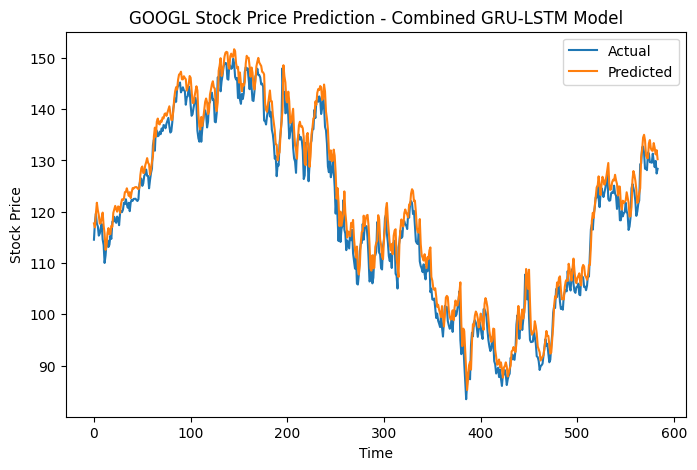

Results for GOOGL:
RMSE: 3.202613890943262
[*********************100%%**********************]  1 of 1 completed
18/18 [==============================] - 1s 7ms/step


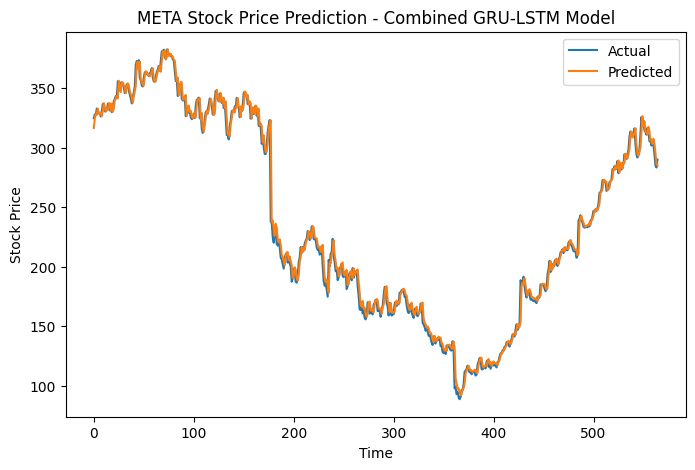

Results for META:
RMSE: 7.1617673895872835
[*********************100%%**********************]  1 of 1 completed
19/19 [==============================] - 1s 2ms/step


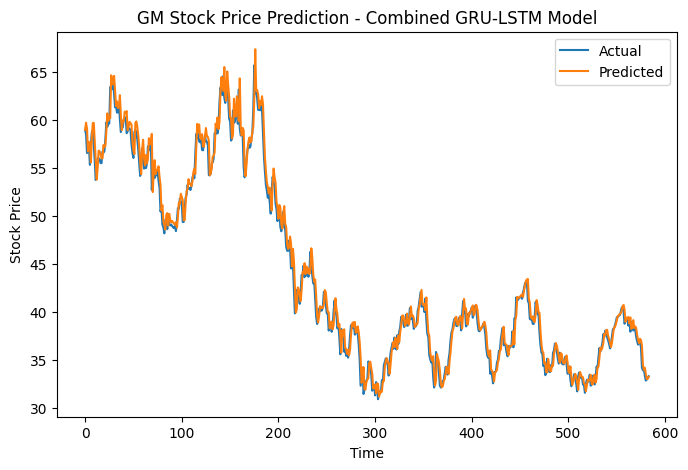

Results for GM:
RMSE: 1.1848616746029572
[*********************100%%**********************]  1 of 1 completed
19/19 [==============================] - 1s 7ms/step


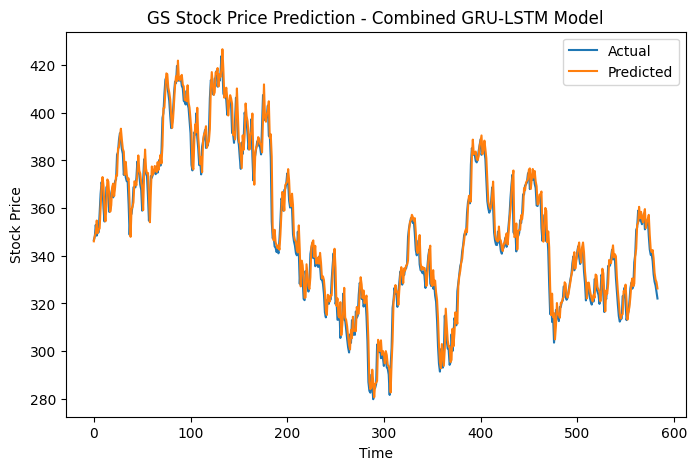

Results for GS:
RMSE: 5.957081561957631


In [ ]:
for symbol, data in results.items():
    # Fetch and preprocess data
    stock_data = fetch_stock_data(symbol, start_date, end_date)
    scaled_data, scaler = preprocess_data(stock_data)
    seq_length = 10  # Set sequence length
    sequences, targets = create_sequences(scaled_data, seq_length)

    # Split the data into training and testing sets
    train_size = int(0.8 * len(sequences))
    train_X, test_X = sequences[:train_size], sequences[train_size:]
    train_y, test_y = targets[:train_size], targets[train_size:]

    # Create combined GRU-LSTM model with best parameters
    best_units = data['Best Parameters']['units']
    best_lr = data['Best Parameters']['learning_rate']

    model = Sequential()
    model.add(LSTM(units=best_units, return_sequences=True, input_shape=(seq_length, 1)))
    model.add(GRU(units=best_units))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=best_lr), loss='mean_squared_error')

    # Train the model
    model.fit(train_X, train_y, epochs=50, batch_size=32, verbose=0)

    # Make predictions on test set
    test_predictions = model.predict(test_X)
    test_predictions = scaler.inverse_transform(test_predictions)
    test_y_original = scaler.inverse_transform(test_y.reshape(-1, 1))

    # Plot actual vs predicted values
    plt.figure(figsize=(8, 5))
    plt.plot(test_y_original, label="Actual")
    plt.plot(test_predictions, label="Predicted")
    plt.title(f"{symbol} Stock Price Prediction - Combined GRU-LSTM Model")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(test_y_original, test_predictions))
    print(f"Results for {symbol}:")
    print("RMSE:", rmse)
    # You can calculate and print other metrics like MAE, MAPE if needed


In [ ]:
for symbol, data in results.items():
    # Fetch and preprocess data
    stock_data = fetch_stock_data(symbol, start_date, end_date)
    scaled_data, scaler = preprocess_data(stock_data)
    seq_length = 10  # Set sequence length
    sequences, targets = create_sequences(scaled_data, seq_length)

    # Split the data into training and testing sets
    train_size = int(0.8 * len(sequences))
    train_X, test_X = sequences[:train_size], sequences[train_size:]
    train_y, test_y = targets[:train_size], targets[train_size:]

    # Create combined GRU-LSTM model with best parameters
    best_units = data['Best Parameters']['units']
    best_lr = data['Best Parameters']['learning_rate']

    model = Sequential()
    model.add(LSTM(units=best_units, return_sequences=True, input_shape=(seq_length, 1)))
    model.add(GRU(units=best_units))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=best_lr), loss='mean_squared_error')

    # Train the model
    model.fit(train_X, train_y, epochs=50, batch_size=32, verbose=0)

    # Make predictions on test set
    test_predictions = model.predict(test_X)
    test_predictions = scaler.inverse_transform(test_predictions)
    test_y_original = scaler.inverse_transform(test_y.reshape(-1, 1))

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(test_y_original, test_predictions))
    mae = mean_absolute_error(test_y_original, test_predictions)
    mape = mean_absolute_percentage_error(test_y_original, test_predictions)

    # Print evaluation metrics
    print(f"Results for {symbol}:")
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("MAPE:", mape)


[*********************100%%**********************]  1 of 1 completed
19/19 [==============================] - 1s 2ms/step
Results for GOOGL:
RMSE: 4.962632615293644
MAE: 4.431765804552052
MAPE: 0.03755553932882122
[*********************100%%**********************]  1 of 1 completed
18/18 [==============================] - 1s 5ms/step
Results for META:
RMSE: 7.283891816357845
MAE: 4.772291227357577
MAPE: 0.02226529937597775
[*********************100%%**********************]  1 of 1 completed
19/19 [==============================] - 1s 2ms/step
Results for GM:
RMSE: 1.1794986743299471
MAE: 0.8900096579773785
MAPE: 0.02045185562779007
[*********************100%%**********************]  1 of 1 completed
19/19 [==============================] - 1s 5ms/step
Results for GS:
RMSE: 9.901581239286438
MAE: 8.523258784045911
MAPE: 0.024188490336679545
